## Royal University of Phnom Penh Faculty Engineering 

### Project Practicum Topic : Animals Recognition

>By: Soy Vitou, Supervisor: Kor Sokchea

### 1. Obstacle Problem

I want to develop an animal recognition system that can identify household pets, especially cats & dogs.
- The system should be able to recognize the species of the animal in an image, distinguishing between dogs & cats.
- The classes for our animal first scope recognition system would be only "cat" & "dog" and various pets.
- Data Collection and Labeling: I collect a dataset of images containing various breeds of dogs and cats. Each image is labeled with the corresponding class (dog or cat).

### 2. Data Collection
- I'm using image downloader extension for collect dataset, An image downloader extension is a browser extension that allows users to easily download images from webpages they are browsing. These extensions provide a convenient way to save images without the need for additional tools or manual steps.
- Some how I'm using Kaggle community for download datasets. Kaggle is a popular online platform for data science and machine learning that provides a wide range of datasets for users to explore and work with. Kaggle hosts datasets contributed by the community as well as datasets from organizations and competitions.

### 3. Data Cleaning
Perform quality checks on the dataset to identify and handle any errors, outliers, or irrelevant images. Remove any duplicate or corrupted images that might affect the training process.\
Here is some tips for cleaning image data:
- <span style="color:gold;">Removing duplicates</span>: Check for and remove any duplicate images in the dataset. Duplicates can skew the results and unnecessarily increase the dataset size.
- <span style="color:gold;">Handling missing or corrupted images</span>: Identify and handle any missing or corrupted images in the dataset. This may involve removing or replacing them to maintain the integrity of the dataset.
- <span style="color:gold;">Standardizing image formats</span>: Ensure that all images in the dataset are in a consistent format. Convert images to a common format (e.g., JPEG, PNG) and ensure that they have consistent dimensions and color channels.
- <span style="color:gold;">Rescaling and normalization</span>: Resize images to a consistent resolution or scale to ensure uniformity. Additionally, normalize the pixel values of the images to a common range (e.g., 0 to 1) to facilitate model training.
- <span style="color:gold;">Removing irrelevant or noisy images</span>: Review the dataset and remove any irrelevant or noisy images that don't contribute to the intended purpose of the dataset. This may involve manually inspecting images or using image analysis techniques to identify outliers.
- <span style="color:gold;">Label verification</span>: Ensure that the labels or annotations associated with the images are accurate and consistent. Review the labels to identify and correct any errors or inconsistencies.
- <span style="color:gold;">Balancing the dataset</span>: If the dataset is imbalanced (i.e., some classes have significantly fewer samples than others), consider techniques such as oversampling, undersampling, or generating synthetic samples to balance the dataset. This can help prevent bias towards the majority class during model training.

### 4. Data Spliting
- I'm using manual spliting or additional tool, Seperate its by folder. Divide my dataset into three main subsets: training set, validation set, and test set. The training set is used to train the model, the validation set is used to fine-tune the model's hyperparameters, and the test set is used to evaluate the model's performance.
- Typically, around <span style="color:lime;">60-80%</span> of the dataset is allocated to the <span style="color:gold;">training set</span>, depending on the size of the dataset.
- <span style="color:gold;">Validation set</span> Usually, around <span style="color:lime;">10-20%</span> of the dataset is reserved for the validation set.
- Around <span style="color:lime;">10-20%</span> of the dataset is kept as the <span style="color:gold;">test set</span>.

### 5. Python libraries Usage
- <span style="color:cyan;"> torch.autograd import Variable </span> : mostly we use its for integrated into the tensor operations.
- <span style="color:cyan;"> import torchvision.transforms as transforms</span>: torchvision.transforms provides various image transformations and data augmentation techniques that can be applied to the dataset.
- <span style="color:cyan;"> import torchvision</span>: provides access to popular datasets, architectures, and other utilities for computer vision tasks.
- <span style="color:cyan;"> import torch </span>: THis is the core library for tensor operations and deep learning in PyTorch.
- <span style="color:cyan;"> import torch.nn as nn </span>: This line imports the nn module from the torch.nn package, which provides pre-defined neural network layers, activation functions, loss functions, and other components needed for building neural networks.
- <span style="color:cyan;"> import torch.nn.functional as F </span>: This line imports the F module from the torch.nn.functional package. It provides various functional operations commonly used in deep learning, such as activation functions, pooling operations, and loss functions.
- <span style="color:cyan;"> from torch.utils.data import DataLoader</span>: This line imports the DataLoader class from the torch.utils.data module. DataLoader is used to create a data iterator that provides efficient batch loading of data during training.
- <span style="color:cyan;"> import pathlib </span>: This line imports the pathlib module, which provides a convenient way to work with file paths and directories.
- <span style="color:cyan;"> from torch.optim import Adam</span>: This line imports the Adam optimizer from the torch.optim module. Adam is a popular optimization algorithm commonly used for training deep learning models.
- <span style="color:cyan;"> import glob</span>: This line imports the glob module, which provides functions for searching files and directories using wildcard patterns.

In [49]:
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import pathlib
from torch.optim import Adam
import glob
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

### 6. Structure might look like this:
+ train_path and test_path represent the file paths to the directories containing my training and test image data, respectively.
#####
    ├──valid/
        ├── dog/
        │   ├── dog1.jpg
        │   ├── dog2.jpg
        │   └── ...
        ├── cat/
        │   ├── cat1.jpg
        │   ├── cat2.jpg
        │   └── ...
        └── ...
    ├──train/
        ├── dog/
        │   ├── dog1.jpg
        │   ├── dog2.jpg
        │   └── ...
        ├── cat/
        │   ├── cat1.jpg
        │   ├── cat2.jpg
        │   └── ...
        └── ...
    ├──test/
        ├── dog1.jpg
        ├── dog2.jpg
        ├── cat2.jpg
        ├── cat1.jpg
        ├── dog3.jpg
        ├── cat4.jpg
        └── ...

In [50]:
train_path = "./dataset/train"
valid_path = "./dataset/valid"
test_path = "./dataset/test/"

### 7. Data Augmentation
- Apply data augmentation techniques to increase the diversity of the training data and make the model more robust. Common augmentations include random rotations, flips, crops, and changes in brightness or contrast.


In [51]:
# Define the transformations for data augmentation
train_transforms = transforms.Compose([
    transforms.Resize((150, 150)),
    #transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    #transforms.RandomRotation(10),  # Randomly rotate images by a maximum of 10 degrees
    #transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Randomly adjust brightness, contrast, saturation, and hue
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

valid_transforms = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])


In [52]:
# Create data loaders with data augmentation
train_data = DataLoader(
    datasets.ImageFolder(train_path, transform=train_transforms),
    batch_size=32,
    shuffle=True
)

test_data = DataLoader(
    datasets.ImageFolder(valid_path, transform=valid_transforms),
    batch_size=32,
    shuffle=True
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

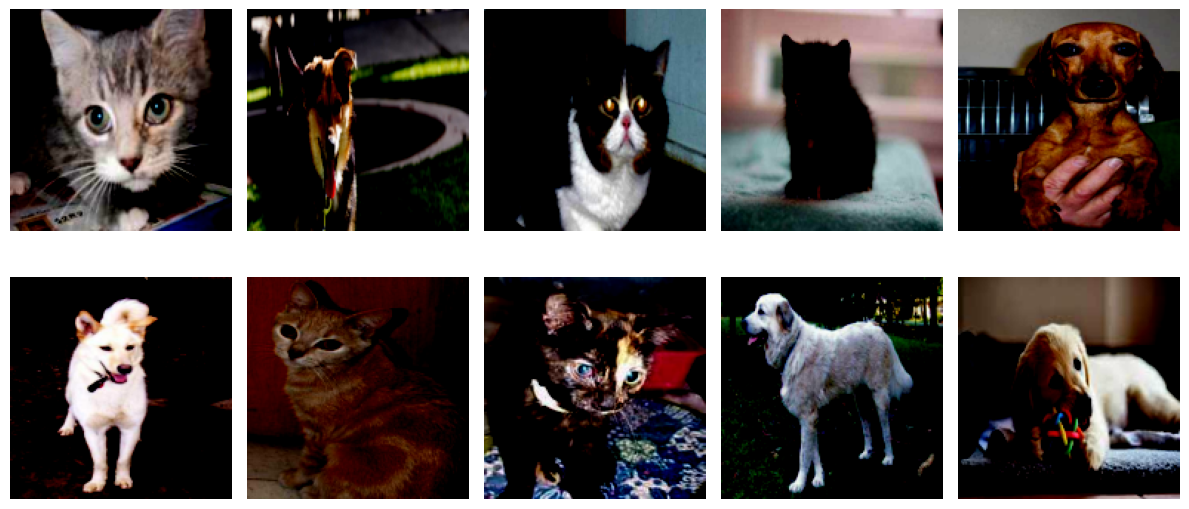

In [44]:
# Counter to keep track of displayed images
displayed_images = 0

# Create a subplot with 2 rows and 5 columns
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

# Iterate over the DataLoader to get batches of images and labels
for batch_images, batch_labels in train_data:
    # Iterate over the images in the current batch
    for image, ax in zip(batch_images, axes.flatten()):
        # Convert the PyTorch tensor to a NumPy array
        image = image.numpy()

        # Convert the image from CHW to HWC format
        image = np.transpose(image, (1, 2, 0))

        # Display the image on the corresponding subplot
        ax.imshow(image)
        ax.axis('off')

        # Increment the displayed image counter
        displayed_images += 1

        # Check if we have displayed 10 images
        if displayed_images == 10:
            break

    # Check if we have displayed 10 images
    if displayed_images == 10:
        break

# Adjust the spacing between subplots
plt.tight_layout()

# Display the grid of images
plt.show()

- I'm used to determine the device (CPU or GPU) on which the computations will be performed in PyTorch.

In [53]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

- I'm using the pathlib module to list the subdirectories (classes) within the train_path directory and print them in sorted order.

In [54]:
root = pathlib.Path(train_path)
classes = sorted([j.name] for j in root.iterdir())
print(classes)

[['cats'], ['dogs']]


### 8. Design Model Architecture
- This model I'm designed for classify images of cats and dogs into different class.

- <span style="color:cyan;">Convolutional layers</span> in neural networks perform the convolution operation, which involves sliding a small filter or kernel over the input data and computing the dot product between the filter and the overlapping region of the input. This operation helps extract local patterns and features from the input.
- <span style="color:cyan;">Batch normalization</span> is a technique used to improve the training and performance of deep neural networks. It normalizes the activations of a layer by subtracting the mini-batch mean and dividing by the mini-batch standard deviation. This normalization helps to mitigate the internal covariate shift problem and provides several benefits, stabilizing training, faster convergence, regularization, improved generalization.
- <span style="color:cyan;">ReLu</span> takes the input value x and returns the maximum between 0 and x. If the input is negative, ReLU sets it to 0, otherwise, it keeps the input value unchanged. Here are some key properties and benefits of ReLU, Non-linearity, Sparsity, Efficiency, Avoiding the vanishing gradient problem
- <span style="color:cyan;">Max pooling</span> is a form of subsampling or downsampling that reduces the size of feature maps while retaining important information. It operates on small windows or regions of the input and replaces each window with the maximum value found within that window.

In [55]:
class CatDogClassifier(nn.Module):

    def __init__(self, num_classes):
        super(CatDogClassifier, self).__init__()
        
        #Output size after convolutional filter
        #((W - F + 2P)/ S) + 1 
      
        
        #Input shape = (256, 3, 150, 150)
        
        self.conv1 = nn.Conv2d(3, 12, kernel_size=3, stride = 1, padding = 1)
        #Shape = (256, 12, 150, 150)
        self.bn1 = nn.BatchNorm2d(num_features=12)
        #Shape = (256, 12, 150, 150)
        self.relu1 = nn.ReLU()
        #Shape = (256, 12, 150, 150)
        
        self.pool = nn.MaxPool2d(kernel_size=2)
        #Reduce the image size be fector 2
        #Shape = (256, 12, 75, 75)
        
        self.conv2 = nn.Conv2d(12, 20, kernel_size=3, stride = 1, padding = 1)
        #Shape = (256, 20, 75, 75)
        self.relu2 = nn.ReLU()
        #Shape = (256, 20, 75, 75)
        
        self.conv3 = nn.Conv2d(20, 32, kernel_size=3, stride = 1, padding = 1)
        #Shape = (256, 32, 75, 75)
        self.bn3 = nn.BatchNorm2d(num_features=32)
        #Shape = (256, 32, 75, 75)
        self.relu3 = nn.ReLU()
        #Shape = (256, 32, 75, 75)
        
        self.fc = nn.Linear(in_features=32*75*75, out_features=num_classes)
        
    #Feed forward function
    def forward(self, input):
        output = self.conv1(input)
        output = self.bn1(output)
        output = self.relu1(output)
        
        output = self.pool(output)
        
        output = self.conv2(output)
        output = self.relu2(output)
        
        output = self.conv3(output)
        output = self.bn3(output)
        output = self.relu3(output)
        
        #Above output will be in matrix form, with shape (256, 32, 75, 75)
        output = output.view(-1, 32*75*75)
        
        #fully connected layer
        output = self.fc(output)
        
        return output

- I'm initializes an instance of the CatDogClassifier model and assigns it to the model variable. It also creates an instance of the CrossEntropyLoss criterion and assigns it to the criterion variable.
- CrossEntropyLoss instance used to calculate the loss between the model's predictions and the ground truth labels.

In [56]:
model = CatDogClassifier(len(classes)).to(device)
criterion = nn.CrossEntropyLoss()

- I'm initializes an instance of the Adam optimizer and assigns it to the optimizer variable. It also creates an instance of the CrossEntropyLoss criterion and assigns it to the loss_function variable.

In [57]:
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
lose_function = nn.CrossEntropyLoss()

- I'm calculates the number of images in the training and testing datasets using the glob module.

In [58]:
train_count = len(glob.glob(train_path + '/**/*.jpg'))
valid_count = len(glob.glob(valid_path + '/**/*.jpg'))
test_count = len(glob.glob(test_path + '/*.jpg'))
totals = train_count + valid_count
print("Train : {:.0f}% | {:.0f}".format(train_count/totals * 100, train_count))
print("Validation : {:.0f}% | {:.0f}".format(valid_count/totals * 100, valid_count))
print("Test : {:.0f}% | {:.0f}".format(test_count/totals * 100, test_count))

Train : 68% | 742
Validation : 32% | 342
Test : 1% | 9


### 9. Training and Saving the best models
- Models training and Saving the best models
- Evaluation and training on training dataset
- Evaluation on testing dataset

In [59]:
epochs = 10
for epoch in range(epochs):
    
    #Evaluation and training on training dataset
    model.train()
    train_accuracy = 0.0
    train_lose = 0.0
    
    for i, (images, labels) in enumerate(train_data):
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())
        
        optimizer.zero_grad()
        
        outputs = model(images)
        lose = lose_function(outputs, labels)
        lose.backward()
        optimizer.step()
        
        train_lose += lose.cpu().data*images.size(0)
        _, prediction = torch.max(outputs.data, 1)
        
        train_accuracy += int(torch.sum(prediction == labels.data))
    
    train_accuracy = train_accuracy / train_count
    train_lose = train_lose / train_count
    
    
    #Evaluation on testing dataset
    model.eval()
    
    test_accuracy = 0.0
    
    for i, (images, labels) in enumerate(test_data):
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())
        
        outputs = model(images)
        _,prediction = torch.max(outputs.data, 1)
        test_accuracy += int(torch.sum(prediction == labels.data))
        
    test_accuracy = test_accuracy /train_count
    
    print('Epoch: ' + str(epoch) + ' => Train lose :' + str(int(train_lose)) + ' =>Test Accuracy : ' + str(test_accuracy))
    best_accuracy = 0.0
    #Saving the best models
    if test_accuracy > best_accuracy:
        torch.save(model.state_dict(), 'best_checkpoint.model')
        best_accuracy = test_accuracy

Epoch: 0 => Train lose :11 =>Test Accuracy : 0.24932614555256064
Epoch: 1 => Train lose :2 =>Test Accuracy : 0.2574123989218329
Epoch: 2 => Train lose :1 =>Test Accuracy : 0.2991913746630728
Epoch: 3 => Train lose :0 =>Test Accuracy : 0.29380053908355797
Epoch: 4 => Train lose :0 =>Test Accuracy : 0.2857142857142857
Epoch: 5 => Train lose :0 =>Test Accuracy : 0.2816711590296496
Epoch: 6 => Train lose :0 =>Test Accuracy : 0.2587601078167116
Epoch: 7 => Train lose :0 =>Test Accuracy : 0.29110512129380056
Epoch: 8 => Train lose :0 =>Test Accuracy : 0.2816711590296496
Epoch: 9 => Train lose :0 =>Test Accuracy : 0.2816711590296496


#### - Now I'm getting low test accuracy values. There are several aspects I will consider to improve the performance of my model. Here are some potential areas that's I will focus on:
- <span style="color:cyan;">Model Architecture</span>: Evaluate my model architecture and ensure it is suitable for the given task. Consider using deeper networks, adding more layers, or exploring different types of layers (e.g., convolutional layers, recurrent layers) depending on the nature of my data.

- <span style="color:cyan;">Hyperparameter Tuning</span>: Experiment with different hyperparameter settings such as learning rate, batch size, number of epochs, regularization techniques (e.g., dropout, L1/L2 regularization), and optimizer choices (e.g., Adam, RMSProp). Fine-tuning these parameters can have a significant impact on model performance.

- <span style="color:cyan;">Data Augmentation</span>: Apply data augmentation techniques to artificially increase the diversity and size of my training dataset. Techniques such as random cropping, flipping, rotation, and adding noise can help my model generalize better to unseen data.

- <span style="color:cyan;">Increase Training Data</span>: If possible, try to acquire more training data. Increasing the size of my dataset can help my model learn more representative patterns and improve its ability to generalize.

- <span style="color:cyan;">Normalization</span>: Ensure that my input data is properly normalized. Normalize the input images to have zero mean and unit variance or apply other normalization techniques that are suitable for my data.

- <span style="color:cyan;">Regularization</span>: Regularize my model to prevent overfitting. Experiment with techniques like dropout, weight decay, or early stopping to reduce overfitting and improve generalization.

- <span style="color:cyan;">Model Complexity</span>: If my model is too complex for the given task, it may lead to overfitting. Consider reducing the complexity of my model by removing unnecessary layers or reducing the number of parameters.

- <span style="color:cyan;">Dataset Imbalance</span>: Check if your dataset suffers from class imbalance, where some classes have significantly more or fewer samples than others. In such cases, consider using techniques like class weighting, oversampling, or undersampling to address this issue.

- <span style="color:cyan;">Error Analysis</span>: Analyze the types of errors my model is making. Look for patterns or specific classes where the model struggles. This analysis can provide insights into areas where I can focus your improvement efforts.

- <span style="color:cyan;">Ensemble Methods</span>: Consider using ensemble methods, such as combining multiple models or predictions, to improve overall performance. Ensemble techniques can help to mitigate the weaknesses of individual models and enhance overall prediction accuracy.